In [3]:
import numpy as np
import matplotlib.pyplot as plt



import sys
sys.path.append('./..')

import cortex_models
import utils
import init


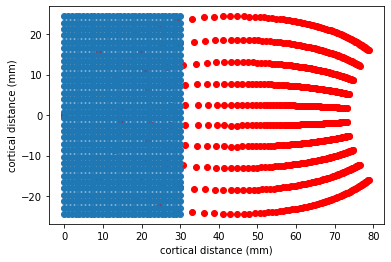

initialized 819 phosphenes, removed 241, 578 left


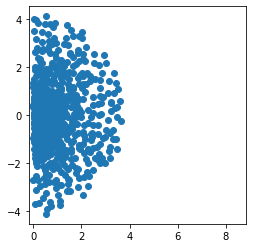

In [7]:
params = utils.load_params('../config/params.yaml')

electrode_coords = cortex_models.init_covering_electrode_grid(params['cortex_model'],n_electrodes_x=32,n_electrodes_y=32,max_x=30,plot=True)

r, phi = init.init_from_cortex(params, electrode_coords)
plt.scatter(r*np.cos(phi),r*np.sin(phi))
plt.axis('square')
plt.show()

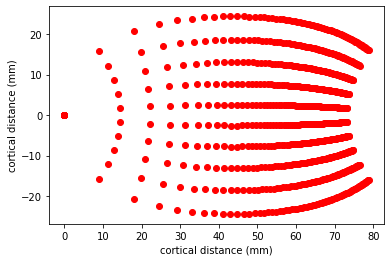

In [16]:
z = cortex_models.init_full_view()
mapping = cortex_models.init_mapping(params['cortex_model']['model'])
x_cortex, y_cortex = cortex_models.generate_cortical_map(mapping, z, params['cortex_model'])

# if max_x:
#     x = np.linspace(x_cortex.min(), max_x, n_electrodes_x)
# else:
#     x = np.linspace(x_cortex.min(), x_cortex.max(), n_electrodes_x)

# y = np.linspace(y_cortex.min(), y_cortex.max(), n_electrodes_y)

# x_coords, y_coords = np.meshgrid(x,y)
# x_coords = x_coords.flatten()
# y_coords = y_coords.flatten()


plt.scatter(x_cortex,y_cortex,c='r')
#     plt.scatter(x_coords,y_coords)
plt.xlabel('cortical distance (mm)')
plt.ylabel('cortical distance (mm)')
plt.show()


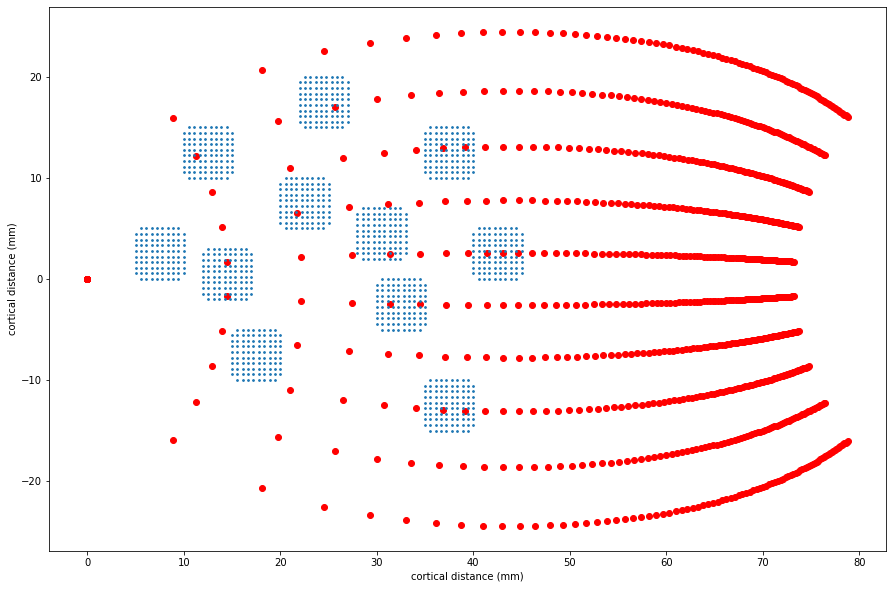

In [94]:
x = []
y = []

for grid_loc in [(5,0), (10,10),(12,-2), (22,15), (15,-10),(28,2), (20,5),(30,-5),(35,-15),(40,0), (35,10) ]:
    x_, y_ = grid_loc
    xrange = np.linspace(x_, x_+5, 10)
    yrange = np.linspace(y_, y_+5, 10)
    x_coords, y_coords = np.meshgrid(xrange,yrange)
    x_coords = np.delete(x_coords.flatten().copy(),[0,9,90,99]) # Remove corner electrodes
    y_coords = np.delete(y_coords.flatten().copy(),[0,9,90,99]) # Remove corner electrodes
    x += [*x_coords]
    y += [*y_coords]

plt.figure(figsize=(15,10))
plt.scatter(x_cortex,y_cortex,c='r')
plt.scatter(x,y, s=3)
plt.xlabel('cortical distance (mm)')
plt.ylabel('cortical distance (mm)')
plt.show()

initialized 768 phosphenes, removed 0, 768 left


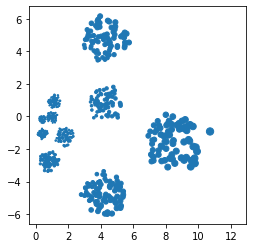

In [92]:
r, phi = init.init_from_cortex(params, (np.array(x),np.array(y)))


M = init.init_magnification(params, r)


plt.scatter(r*np.cos(phi),r*np.sin(phi), s = 100/(M**2))
plt.axis('square')
plt.show()

(array([103., 111.,  20.,  44.,  52.,  69.,  60.,  31.,  24.,  23.]),
 array([0.02107831, 0.04473934, 0.06840036, 0.09206139, 0.11572242,
        0.13938345, 0.16304448, 0.1867055 , 0.21036653, 0.23402756,
        0.25768859]),
 <BarContainer object of 10 artists>)

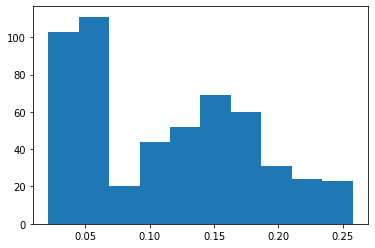

In [85]:
CURRENT_SPREAD = 0.000675
AMPLITUDE = 90e-6

activated_cortex = (AMPLITUDE/CURRENT_SPREAD)**0.5

plt.hist(activated_cortex / M)

In [ ]:
# Input current effect on size
if self.size['size_equation'] == 'sqrt':
    AC = (stim_amp/self.size['current_spread'])**0.5 # Tehovnik 2007
elif self.size['size_equation'] == 'sigmoid':
    AC = self.size['MD'] / (1+torch.exp(-self.size['slope_size']*(stim_amp-self.size['I_half'])))/2 # Bosking et al., 2017
else:
    raise ValueError("Invalid size equation, should be 'sqrt' or 'sigmoid'")